In [155]:
library(class)
library(tidyverse)
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

### Recognizing a road sign with kNN

After several trips with a human behind the wheel, it is time for the self-driving car to attempt the test course alone.

As it begins to drive away, its camera captures the following image:

Stop Sign

Can you apply a kNN classifier to help the car recognize this sign?

In [22]:
signs <- read.csv("knn_traffic_signs.csv")
train <- filter(signs, sample == "train")
test <- filter(signs, sample == "test")
example <- filter(signs, sample == "example")

# Create a vector of labels
sign_types <- train$sign_type

# Classify the next sign observed
knn(train = train[c(-1,-2,-3)], test = example[c(-1,-2,-3)], cl = sign_types)

[1] stop
Levels: pedestrian speed stop

kNN isn't really learning anything; it simply looks for the most similar example.

### Exploring the traffic sign dataset

To better understand how the `knn()` function was able to classify the stop sign, it may help to examine the training dataset it used.

Each previously observed street sign was divided into a 4x4 grid, and the red, green, and blue level for each of the 16 center pixels is recorded as illustrated here.

![stop](stop_sign_grid.png)

The result is a dataset that records the sign_type as well as 16 x 3 = 48 color properties of each sign.

In [24]:
# Examine the structure of the signs dataset
str(signs)

# Count the number of signs of each type
table(signs$sign_type)

# Check r10's average red level by sign type
aggregate(r10 ~ sign_type, data = signs, mean)

'data.frame':	206 obs. of  51 variables:
 $ id       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sample   : Factor w/ 3 levels "example","test",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ sign_type: Factor w/ 3 levels "pedestrian","speed",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ r1       : int  155 142 57 22 169 75 136 118 149 13 ...
 $ g1       : int  228 217 54 35 179 67 149 105 225 34 ...
 $ b1       : int  251 242 50 41 170 60 157 69 241 28 ...
 $ r2       : int  135 166 187 171 231 131 200 244 34 5 ...
 $ g2       : int  188 204 201 178 254 89 203 245 45 21 ...
 $ b2       : int  101 44 68 26 27 53 107 67 1 11 ...
 $ r3       : int  156 142 51 19 97 214 150 132 155 123 ...
 $ g3       : int  227 217 51 27 107 144 167 123 226 154 ...
 $ b3       : int  245 242 45 29 99 75 134 12 238 140 ...
 $ r4       : int  145 147 59 19 123 156 171 138 147 21 ...
 $ g4       : int  211 219 62 27 147 169 218 123 222 46 ...
 $ b4       : int  228 242 65 29 152 190 252 85 242 41 ...
 $ r5       : int  166 164 156 42 221 67 171 25


pedestrian      speed       stop 
        65         70         71 

sign_type,r10
pedestrian,108.78462
speed,83.08571
stop,142.50704


As you might have expected, stop signs tend to have a higher average red value. This is how kNN identifies similar signs. 

### Classifying a collection of road signs

Now that the autonomous vehicle has successfully stopped on its own, your team feels confident allowing the car to continue the test course.

The test course includes 59 additional road signs divided into three types:

![signs](signs.png)

At the conclusion of the trial, you are asked to measure the car's overall performance at recognizing these signs.

In [29]:
# Use kNN to identify the test road signs
sign_types <- train$sign_type
signs_pred <- knn(train = train[c(-1,-2,-3)], test = test[c(-1,-2,-3)], cl = sign_types)

# Create a confusion matrix of the actual versus predicted values
signs_actual <- test$sign_type
table(signs_pred, signs_actual)


            signs_actual
signs_pred   pedestrian speed stop
  pedestrian         19     2    0
  speed               0    17    0
  stop                0     2   19

In [32]:
# Compute the accuracy
mean(signs_pred == signs_actual)

[1] 0.9322034

That self-driving car is really coming along! The confusion matrix lets you look for patterns in the classifier's errors. 

## Testing other 'k' values

By default, the `knn()` function in the class package uses only the single nearest neighbor.

Setting a k parameter allows the algorithm to consider additional nearby neighbors. This enlarges the collection of neighbors which will vote on the predicted class.

Compare k values of 1, 7, and 15 to examine the impact on traffic sign classification accuracy.

In [36]:
# Compute the accuracy of the baseline model (default k = 1)
k_1 <- knn(train = train[c(-1, -2, -3)], test = test[c(-1, -2, -3)], cl = sign_types)
mean(k_1 == test$sign_type)

# Modify the above to set k = 7
k_7 <- knn(train = train[c(-1, -2, -3)], test = test[c(-1, -2, -3)], cl = sign_types, k = 7)
mean(k_7 == test$sign_type)

# Set k = 15 and compare to the above
k_15 <- knn(train = train[c(-1, -2, -3)], test = test[c(-1, -2, -3)], cl = sign_types, k = 15)
mean(k_15 == test$sign_type)


[1] 0.9322034

[1] 0.9491525

[1] 0.9152542

## Seeing how the neighbors voted

When multiple nearest neighbors hold a vote, it can sometimes be useful to examine whether the voters were unanimous or widely separated.

For example, knowing more about the voters' confidence in the classification could allow an autonomous vehicle to use caution in the case there is any chance at all that a stop sign is ahead.

In this exercise, you will learn how to obtain the voting results from the `knn()` function.

In [38]:
# Use the prob parameter to get the proportion of votes for the winning class
sign_pred <- knn(train = train[c(-1, -2, -3)], test = test[c(-1, -2, -3)], cl = sign_types, k = 7, prob = TRUE)

# Get the "prob" attribute from the predicted classes
sign_prob <- attr(sign_pred, "prob")

# Examine the first several predictions
head(sign_pred)

# Examine the proportion of votes for the winning class
head(sign_prob)

[1] pedestrian pedestrian pedestrian stop       pedestrian pedestrian
Levels: pedestrian speed stop

[1] 0.5714286 0.5714286 0.8571429 0.5714286 0.8571429 0.5714286

 Now you can get an idea of how certain your kNN learner is about its classifications. 

### Normalize data

Before applying kNN to a classification task, it is common practice to rescale the data using a technique like min-max normalization. What is the purpose of this step?
 * To ensure all data elements may contribute equal shares to distance. Rescaling reduces the influence of extreme values on kNN's distance function.
 
 $$ \frac{(x - min(x))}{(max(x) - min(x))} $$

# Bayes statistic
### Computing probabilities

The `where9am` data frame contains 91 days (thirteen weeks) worth of data in which Brett recorded his location at 9am each day as well as whether the daytype was a weekend or weekday.

Using the conditional probability formula below, you can compute the probability that Brett is working in the office, given that it is a weekday.

$$ P(A|B)=P(A and B)P(B)$$

Calculations like these are the basis of the Naive Bayes destination prediction model you'll develop in later exercises.

In [40]:
locations <- read.csv("locations.csv")
str(locations)

'data.frame':	2184 obs. of  7 variables:
 $ month   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day     : int  4 4 4 4 4 4 4 4 4 4 ...
 $ weekday : Factor w/ 7 levels "friday","monday",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ daytype : Factor w/ 2 levels "weekday","weekend": 1 1 1 1 1 1 1 1 1 1 ...
 $ hour    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ hourtype: Factor w/ 4 levels "afternoon","evening",..: 4 4 4 4 4 4 3 3 3 3 ...
 $ location: Factor w/ 7 levels "appointment",..: 3 3 3 3 3 3 3 3 3 4 ...


In [45]:
where9am <- locations %>% filter(hour == 9 & hourtype == "morning") %>%
    select(daytype, location)

In [46]:
# Compute P(A) 
p_A <- nrow(subset(where9am, location == "office")) / nrow(where9am)

# Compute P(B)
p_B <- nrow(subset(where9am, daytype == "weekday")) / nrow(where9am)

# Compute the observed P(A and B)
p_AB <- nrow(subset(where9am, location == "office" & daytype == "weekday")) /nrow(where9am)

# Compute P(A | B) and print its value
p_A_given_B <- p_AB / p_B
p_A_given_B

[1] 0.6

## A simple Naive Bayes location model

The previous exercises showed that the probability that Brett is at work or at home at 9am is highly dependent on whether it is the weekend or a weekday.

To see this finding in action, use the `where9am` data frame to build a Naive Bayes model on the same data.

You can then use this model to predict the future: where does the model think that Brett will be at 9am on Thursday and at 9am on Saturday?A simple Naive Bayes location model

In [117]:
(thursday9am <- where9am$daytype[1])
(saturday9am <- where9am$daytype[89])

[1] weekday
Levels: weekday weekend

[1] weekend
Levels: weekday weekend

In [128]:
# Load the naivebayes package
library(naivebayes)

where9am$location <- droplevels(where9am$location)
levels(where9am$location)

# Build the location prediction model
set.seed(1)
locmodel <- naive_bayes(location ~ daytype, data = where9am)

[1] "appointment" "campus"      "home"        "office"

In [129]:
# Predict Thursday's 9am location
predict(locmodel, newdata = thursday9am)

[1] home
Levels: appointment campus home office

In [130]:
# Predict Saturdays's 9am location
predict(locmodel, newdata = saturday9am)

[1] home
Levels: appointment campus home office

## Examining "raw" probabilities

The naivebayes package offers several ways to peek inside a Naive Bayes model.

Typing the name of the model object provides the a priori (overall) and conditional probabilities of each of the model's predictors. If one were so inclined, you might use these for calculating posterior (predicted) probabilities by hand.

Alternatively, R will compute the posterior probabilities for you if the type = "prob" parameter is supplied to the predict() function.

Using these methods, examine how the model's predicted 9am location probability varies from day-to-day.

In [126]:
# Examine the location prediction model
locmodel

# Obtain the predicted probabilities for Thursday at 9am
predict(locmodel, newdata = thursday9am , type = "prob")

===================== Naive Bayes ===================== 
Call: 
naive_bayes.formula(formula = location ~ daytype, data = where9am)

A priori probabilities: 

appointment      campus        home      office 
 0.01098901  0.10989011  0.45054945  0.42857143 

Tables: 
         
daytype   appointment    campus      home    office
  weekday   1.0000000 1.0000000 0.3658537 1.0000000
  weekend   0.0000000 0.0000000 0.6341463 0.0000000


appointment,campus,home,office
0.01098901,0.1098901,0.4505495,0.4285714


In [131]:
# Obtain the predicted probabilities for Saturday at 9am
predict(locmodel, newdata = saturday9am, type = "prob")

appointment,campus,home,office
0.01098901,0.1098901,0.4505495,0.4285714


 One event is independent of another if knowing one doesn't give you information about how likely the other is. For example, knowing if it's raining in New York doesn't help you predict the weather in San Francisco. The weather events in the two cities are independent of each other.

## A more sophisticated location model

The locations dataset records Brett's location every hour for 13 weeks. Each hour, the tracking information includes the daytype (weekend or weekday) as well as the hourtype (morning, afternoon, evening, or night).

Using this data, build a more sophisticated model to see how Brett's predicted location not only varies by the day of week but also by the time of day.

In [132]:
location <- select(locations, daytype, hourtype, location)
str(location)

'data.frame':	2184 obs. of  3 variables:
 $ daytype : Factor w/ 2 levels "weekday","weekend": 1 1 1 1 1 1 1 1 1 1 ...
 $ hourtype: Factor w/ 4 levels "afternoon","evening",..: 4 4 4 4 4 4 3 3 3 3 ...
 $ location: Factor w/ 7 levels "appointment",..: 3 3 3 3 3 3 3 3 3 4 ...


In [137]:
weekday_afternoon <- location[13,]
weekday_evening <- location[19,]

,daytype,hourtype,location
19,weekday,evening,home


In [138]:
# Build a NB model of location
locmodel <- naive_bayes( location ~ daytype + hourtype, data = location)

# Predict Brett's location on a weekday afternoon
predict(locmodel, newdata = weekday_afternoon)

# Predict Brett's location on a weekday evening
predict(locmodel, newdata = weekday_evening)

[1] office
Levels: appointment campus home office restaurant store theater

[1] home
Levels: appointment campus home office restaurant store theater

## Preparing for unforeseen circumstances

While Brett was tracking his location over 13 weeks, he never went into the office during the weekend. Consequently, the joint probability of P(office and weekend) = 0.

Explore how this impacts the predicted probability that Brett may go to work on the weekend in the future. Additionally, you can see how using the Laplace correction will allow a small chance for these types of unforeseen circumstances.

In [140]:
# The 'naivebayes' package is loaded into the workspace already
# The Naive Bayes location model (locmodel) has already been built

weekend_afternoon <- location[85, ]
# Observe the predicted probabilities for a weekend afternoon
predict(locmodel, newdata = weekend_afternoon, type = "prob")

# Build a new model using the Laplace correction
locmodel2 <- naive_bayes(location ~ daytype + hourtype, data = location, laplace = 1)

# Observe the new predicted probabilities for a weekend afternoon
predict(locmodel2, newdata = weekend_afternoon, type = "prob")

appointment,campus,home,office,restaurant,store,theater
0.02472535,0,0.8472217,0,0.1115693,0.01648357,0


appointment,campus,home,office,restaurant,store,theater
0.01107985,0.005752078,0.8527053,0.008023444,0.1032598,0.01608175,0.003097769


In [141]:
weekend_afternoon

,daytype,hourtype,location
85,weekend,afternoon,home


## Handling numeric predictors

Numeric data is often binned before it is used with Naive Bayes. Examples: 

 * age values recoded as 'child' or 'adult' categories
 * geographic coordinates recoded into geographic regions (West, East, etc.)
 * test scores divided into four groups by percentile

# Logistic regression
### Building simple logistic regression models

The `donors` dataset contains 93,462 examples of people mailed in a fundraising solicitation for paralyzed military veterans. The donated column is 1 if the person made a donation in response to the mailing and 0 otherwise. This binary outcome will be the dependent variable for the logistic regression model.

The remaining columns are features of the prospective donors that may influence their donation behavior. These are the model's independent variables.

When building a regression model, it is often helpful to form a hypothesis about which independent variables will be predictive of the dependent variable. The `bad_address` column, which is set to 1 for an invalid mailing address and 0 otherwise, seems like it might reduce the chances of a donation. Similarly, one might suspect that religious interest (`interest_religion`) and interest in veterans affairs (`interest_veterans`) would be associated with greater charitable giving.

In this exercise, you will use these three factors to create a simple model of donation behavior.

In [143]:
donors <- read.csv("donors.csv")
# Examine the dataset to identify potential independent variables
str(donors)

# Explore the dependent variable
table(donors$donated)

# Build the donation model
donation_model <- glm(donated ~ bad_address + interest_religion + interest_veterans, 
                      data = donors, family = "binomial")

# Summarize the model results
summary(donation_model)

'data.frame':	93462 obs. of  13 variables:
 $ donated          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ veteran          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bad_address      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age              : int  60 46 NA 70 78 NA 38 NA NA 65 ...
 $ has_children     : int  0 1 0 0 1 0 1 0 0 0 ...
 $ wealth_rating    : int  0 3 1 2 1 0 2 3 1 0 ...
 $ interest_veterans: int  0 0 0 0 0 0 0 0 0 0 ...
 $ interest_religion: int  0 0 0 0 1 0 0 0 0 0 ...
 $ pet_owner        : int  0 0 0 0 0 0 1 0 0 0 ...
 $ catalog_shopper  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ recency          : Factor w/ 2 levels "CURRENT","LAPSED": 1 1 1 1 1 1 1 1 1 1 ...
 $ frequency        : Factor w/ 2 levels "FREQUENT","INFREQUENT": 1 1 1 1 1 2 2 1 2 2 ...
 $ money            : Factor w/ 2 levels "HIGH","MEDIUM": 2 1 2 2 2 2 2 2 2 2 ...



    0     1 
88751  4711 


Call:
glm(formula = donated ~ bad_address + interest_religion + interest_veterans, 
    family = "binomial", data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3480  -0.3192  -0.3192  -0.3192   2.5678  

Coefficients:
                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)       -2.95139    0.01652 -178.664   <2e-16 ***
bad_address       -0.30780    0.14348   -2.145   0.0319 *  
interest_religion  0.06724    0.05069    1.327   0.1847    
interest_veterans  0.11009    0.04676    2.354   0.0186 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 37316  on 93458  degrees of freedom
AIC: 37324

Number of Fisher Scoring iterations: 5


## Making a binary prediction

In the previous exercise, you used the `glm()` function to build a logistic regression model of donor behavior. As with many of R's machine learning methods, you can apply the `predict()` function to the model object to forecast future behavior. By default, `predict()` outputs predictions in terms of log odds unless type = "response" is specified. This converts the log odds to probabilities.

Because a logistic regression model estimates the probability of the outcome, it is up to you to determine the threshold at which the probability implies action. One must balance the extremes of being too cautious versus being too aggressive. For example, if you were to solicit only the people with a 99% or greater donation probability, you may miss out on many people with lower estimated probabilities that still choose to donate. This balance is particularly important to consider for severely imbalanced outcomes, such as in this dataset where donations are relatively rare.

In [144]:
donation_model



Call:  glm(formula = donated ~ bad_address + interest_religion + interest_veterans, 
    family = "binomial", data = donors)

Coefficients:
      (Intercept)        bad_address  interest_religion  interest_veterans  
         -2.95139           -0.30780            0.06724            0.11009  

Degrees of Freedom: 93461 Total (i.e. Null);  93458 Residual
Null Deviance:	    37330 
Residual Deviance: 37320 	AIC: 37320

In [150]:
# Estimate the donation probability
donors$donation_prob <- predict(donation_model, type = "response")

# Find the donation probability of the average prospect
mean(donors$donated)

# Predict a donation if probability of donation is greater than average
donors$donation_pred <- ifelse(donors$donation_prob > 0.0504, 1, 0)

# Calculate the model's accuracy
mean(donors$donated == donors$donation_pred)


[1] 0.05040551

[1] 0.794815

The limitations of accuracy

In the previous exercise, you found that the logistic regression model made a correct prediction nearly 80% of the time. Despite this relatively high accuracy, the result is misleading due to the rarity of outcome being predicted.

### Calculating ROC Curves and AUC

The previous exercises have demonstrated that accuracy is a very misleading measure of model performance on imbalanced datasets. Graphing the model's performance better illustrates the tradeoff between a model that is overly agressive and one that is overly passive.

In this exercise you will create a ROC curve and compute the area under the curve (AUC) to evaluate the logistic regression model of donations you built earlier.

Area under the curve: 0.5102

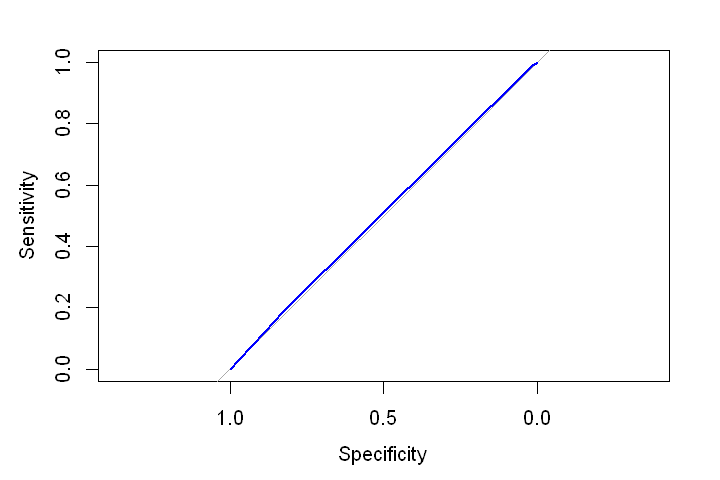

In [156]:
# Load the pROC package
library(pROC)

# Create a ROC curve
ROC <- roc(response = donors$donated, donors$donation_prob)

# Plot the ROC curve
plot(ROC, col = "blue")

# Calculate the area under the curve (AUC)
auc(ROC)

Based on this visualization, the model isn't doing much better than baseline— a model doing nothing but making predictions at random. 

When AUC values are very close, it's important to know more about how the model will be used.

# Dummy variables, missing data, and interactions

### Coding categorical features

Sometimes a dataset contains numeric values that represent a categorical feature.

In the donors dataset, wealth_rating uses numbers to indicate the donor's wealth level:

    0 = Unknown
    1 = Low
    2 = Medium
    3 = High

This exercise illustrates how to prepare this type of categorical feature and the examines its impact on a logistic regression model.

In [157]:
# Convert the wealth rating to a factor
donors$wealth_rating <- factor(donors$wealth_rating, levels = c(0,1,2,3), labels = c("Unknown", "Low", "Medium", "High"))

# Use relevel() to change reference category
donors$wealth_rating <- relevel(donors$wealth_rating, ref = "Medium")

# See how our factor coding impacts the model
summary(glm(donated ~ wealth_rating,family = "binomial", data = donors))


Call:
glm(formula = donated ~ wealth_rating, family = "binomial", data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3320  -0.3243  -0.3175  -0.3175   2.4582  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -2.91894    0.03614 -80.772   <2e-16 ***
wealth_ratingUnknown -0.04373    0.04243  -1.031    0.303    
wealth_ratingLow     -0.05245    0.05332  -0.984    0.325    
wealth_ratingHigh     0.04804    0.04768   1.008    0.314    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 37323  on 93458  degrees of freedom
AIC: 37331

Number of Fisher Scoring iterations: 5


### Handling missing data

Some of the prospective donors have missing age data. Unfortunately, R will exclude any cases with NA values when building a regression model.

One workaround is to replace, or impute, the missing values with an estimated value. After doing so, you may also create a missing data indicator to model the possibility that cases with missing data are different in some way from those without.

In [158]:
# Find the average age among non-missing values
summary(donors$age)

# Impute missing age values with mean(age)
donors$imputed_age <- ifelse(is.na(donors$age),61.65, donors$age)

# Create missing value indicator for age
donors$missing_age <- ifelse(is.na(donors$age), 1, 0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   48.00   62.00   61.65   75.00   98.00   22546 

In [159]:
head(donors)

donated,veteran,bad_address,age,has_children,wealth_rating,interest_veterans,interest_religion,pet_owner,catalog_shopper,recency,frequency,money,donation_prob,donation_pred,imputed_age,missing_age
0,0,0,60,0,Unknown,0,0,0,0,CURRENT,FREQUENT,MEDIUM,0.04967101,0,60.00,0
0,0,0,46,1,High,0,0,0,0,CURRENT,FREQUENT,HIGH,0.04967101,0,46.00,0
0,0,0,NA,0,Low,0,0,0,0,CURRENT,FREQUENT,MEDIUM,0.04967101,0,61.65,1
0,0,0,70,0,Medium,0,0,0,0,CURRENT,FREQUENT,MEDIUM,0.04967101,0,70.00,0
0,0,0,78,1,Low,0,1,0,1,CURRENT,FREQUENT,MEDIUM,0.05294280,1,78.00,0
0,0,0,NA,0,Unknown,0,0,0,0,CURRENT,INFREQUENT,MEDIUM,0.04967101,0,61.65,1


### Understanding missing value indicators

A missing value indicator provides a reminder that, before imputation, there was a missing value present on the record.

It is often useful to include this indicator as a predictor in the model because:
 * A missing value may represent a unique category by itself
 * There may be an important difference between records with and without missing data
 * Whatever caused the missing value may also be related to the outcome

## Building a more sophisticated model

One of the best predictors of future giving is a history of recent, frequent, and large gifts. In marketing terms, this is known as R/F/M:

    Recency
    Frequency
    Money

Donors that haven't given both recently and frequently may be especially likely to give again; in other words, the combined impact of recency and frequency may be greater than the sum of the separate effects.

Because these predictors together have a greater impact on the dependent variable, their joint effect must be modeled as an interaction.


Call:
glm(formula = donated ~ money + recency * frequency, family = "binomial", 
    data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3696  -0.3696  -0.2895  -0.2895   2.7924  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -3.01142    0.04279 -70.375   <2e-16 ***
moneyMEDIUM                        0.36186    0.04300   8.415   <2e-16 ***
recencyLAPSED                     -0.86677    0.41434  -2.092   0.0364 *  
frequencyINFREQUENT               -0.50148    0.03107 -16.143   <2e-16 ***
recencyLAPSED:frequencyINFREQUENT  1.01787    0.51713   1.968   0.0490 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 36938  on 93457  degrees of freedom
AIC: 36948

Number of Fisher Scoring iterations: 6


Area under the curve: 0.5785

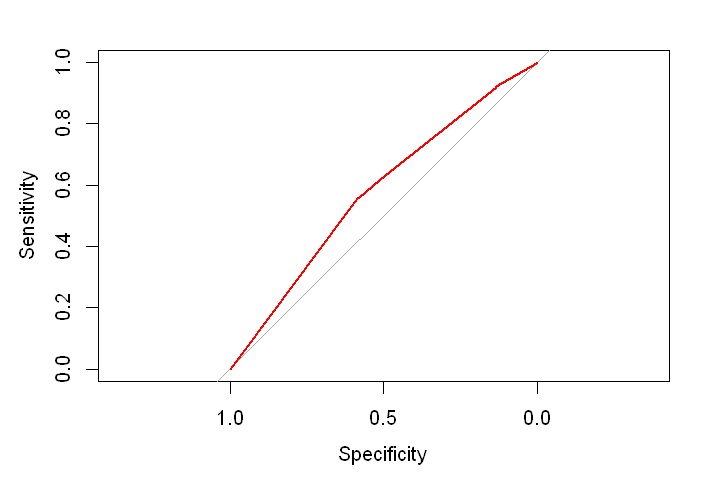

In [160]:
# Build a recency, frequency, and money (RFM) model
rfm_model <- glm(donated ~ money + recency * frequency, data = donors, family = "binomial")

# Summarize the RFM model to see how the parameters were coded
summary(rfm_model)

# Compute predicted probabilities for the RFM model
rfm_prob <- predict(rfm_model, type = "response")

# Plot the ROC curve and find AUC for the new model
library(pROC)
# Remember, this function takes the column of outcomes and the vector of predictions
ROC <- roc(donors$donated, rfm_prob)
plot(ROC, col = "red")
auc(ROC)

# Automatic feature selection
### The dangers of stepwise regression

In spite of its utility for feature selection, stepwise regression is not frequently used in disciplines outside of machine learning due to some important caveats. The concers are:
 * It is not guaranteed to find the best possible model
 * The stepwise regression procedure violates some statistical assumptions
 * It can result in a model that makes little sense in the real world

### Building a stepwise regression model

In the absence of subject-matter expertise, stepwise regression can assist with the search for the most important predictors of the outcome of interest.

In this exercise, you will use a forward stepwise approach to add predictors to the model one-by-one until no additional benefit is seen.

In [163]:
# Specify a null model with no predictors
null_model <- glm(donated ~ 1, data = donors, family = "binomial")

# Specify the full model using all of the potential predictors
full_model <- glm(donated ~ ., data = donors, family = "binomial")

# Use a forward stepwise algorithm to build a parsimonious model
step_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")


Start:  AIC=37332.13
donated ~ 1



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ frequency          1    28502 37122
+ money              1    28621 37241
+ has_children       1    28705 37326
+ age                1    28707 37328
+ imputed_age        1    28707 37328
+ wealth_rating      3    28704 37328
+ interest_veterans  1    28709 37330
+ donation_prob      1    28710 37330
+ donation_pred      1    28710 37330
+ catalog_shopper    1    28710 37330
+ pet_owner          1    28711 37331
<none>                    28714 37332
+ interest_religion  1    28712 37333
+ recency            1    28713 37333
+ bad_address        1    28714 37334
+ veteran            1    28714 37334

Step:  AIC=37024.77
donated ~ frequency



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ money              1    28441 36966
+ wealth_rating      3    28490 37019
+ has_children       1    28494 37019
+ donation_prob      1    28498 37023
+ interest_veterans  1    28498 37023
+ catalog_shopper    1    28499 37024
+ donation_pred      1    28499 37024
+ age                1    28499 37024
+ imputed_age        1    28499 37024
+ pet_owner          1    28499 37024
<none>                    28502 37025
+ interest_religion  1    28501 37026
+ recency            1    28501 37026
+ bad_address        1    28502 37026
+ veteran            1    28502 37027

Step:  AIC=36949.71
donated ~ frequency + money



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ wealth_rating      3    28427 36942
+ has_children       1    28432 36943
+ interest_veterans  1    28438 36948
+ donation_prob      1    28438 36949
+ catalog_shopper    1    28438 36949
+ donation_pred      1    28439 36949
+ age                1    28439 36949
+ imputed_age        1    28439 36949
+ pet_owner          1    28439 36949
<none>                    28441 36950
+ interest_religion  1    28440 36951
+ recency            1    28441 36951
+ bad_address        1    28441 36951
+ veteran            1    28441 36952

Step:  AIC=36945.48
donated ~ frequency + money + wealth_rating



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ has_children       1    28416 36937
+ age                1    28424 36944
+ imputed_age        1    28424 36944
+ interest_veterans  1    28424 36945
+ donation_prob      1    28424 36945
+ catalog_shopper    1    28425 36945
+ donation_pred      1    28425 36945
<none>                    28427 36945
+ pet_owner          1    28425 36946
+ interest_religion  1    28426 36947
+ recency            1    28427 36947
+ bad_address        1    28427 36947
+ veteran            1    28427 36947

Step:  AIC=36938.4
donated ~ frequency + money + wealth_rating + has_children



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ pet_owner          1    28413 36937
+ donation_prob      1    28413 36937
+ catalog_shopper    1    28413 36937
+ interest_veterans  1    28413 36937
+ donation_pred      1    28414 36938
<none>                    28416 36938
+ interest_religion  1    28415 36939
+ age                1    28416 36940
+ imputed_age        1    28416 36940
+ recency            1    28416 36940
+ bad_address        1    28416 36940
+ veteran            1    28416 36940

Step:  AIC=36932.25
donated ~ frequency + money + wealth_rating + has_children + 
    pet_owner



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
<none>                    28413 36932
+ donation_prob      1    28411 36932
+ interest_veterans  1    28411 36932
+ catalog_shopper    1    28412 36933
+ donation_pred      1    28412 36933
+ age                1    28412 36933
+ imputed_age        1    28412 36933
+ recency            1    28413 36934
+ interest_religion  1    28413 36934
+ bad_address        1    28413 36934
+ veteran            1    28413 36934


Area under the curve: 0.5849

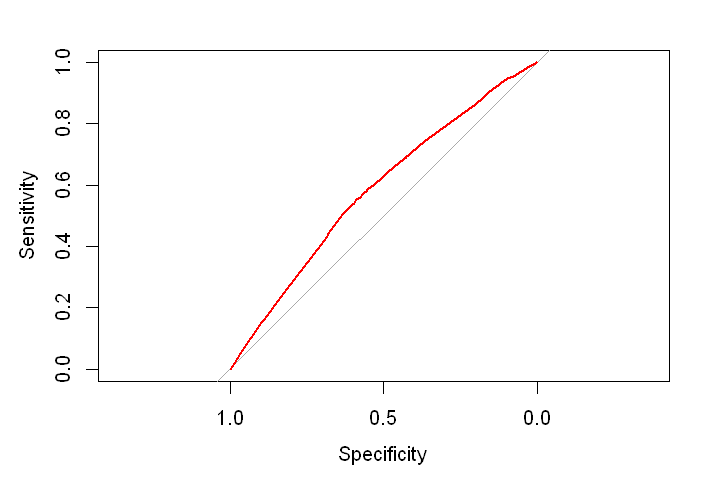

In [164]:
# Estimate the stepwise donation probability
step_prob <- predict(step_model, type = "response")

# Plot the ROC of the stepwise model
ROC <- roc(donors$donated, step_prob)
plot(ROC, col = "red")
auc(ROC)

Start:  AIC=28438.85
donated ~ veteran + bad_address + age + has_children + wealth_rating + 
    interest_veterans + interest_religion + pet_owner + catalog_shopper + 
    recency + frequency + money + donation_prob + donation_pred + 
    imputed_age + missing_age


Step:  AIC=28438.85
donated ~ veteran + bad_address + age + has_children + wealth_rating + 
    interest_veterans + interest_religion + pet_owner + catalog_shopper + 
    recency + frequency + money + donation_prob + donation_pred + 
    imputed_age


Step:  AIC=28438.85
donated ~ veteran + bad_address + age + has_children + wealth_rating + 
    interest_veterans + interest_religion + pet_owner + catalog_shopper + 
    recency + frequency + money + donation_prob + donation_pred

                    Df Deviance   AIC
- veteran            1    28405 28437
- recency            1    28405 28437
- donation_pred      1    28406 28438
- age                1    28406 28438
- pet_owner          1    28406 28438
- catalog_shopper    

ERROR: Error in step(full_model, scope = list(lower = null_model, upper = full_model), : number of rows in use has changed: remove missing values?


In [ ]:
library(repr)
options(repr.plot.width )